## Overview

This blog is aimed for begginers of ANN and Deep Learning. In this, we will discuss about Single Layer Perceptron Model and steps to build using both Python coding and Tensorflow.

A Perceptron Model is typically considered as a single-layer feed-forward network. And it does not have any hidden layer.

Key objective is to learn the basics and understanding the flow. 

A percenptron model has
* Set of inputs and Bias: X and b
* Weights (Vector) for inputs and bias: W
* Aggregation of X and W: b+WX
* Activation Function to be applied on the aggregated value: g
* Predicted output - Y-cap= g(b+WX)
* Actual Output - Y
* Loss Function - e.g. Average of (Y-cap -Y)**2

#### Simple Perceptrom Model

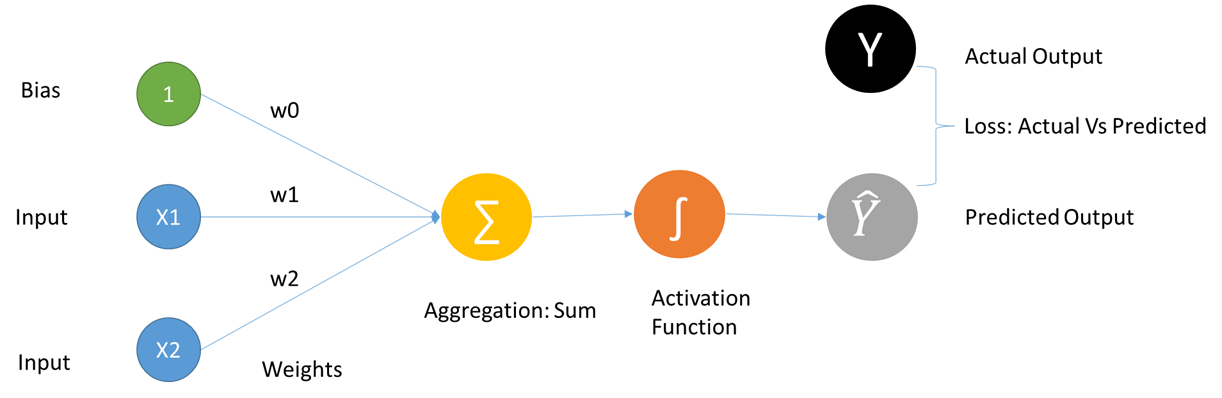


Based on initial weight vector values, input values, and selected activation function, the predicted value is calculated. The predicted  output is compared with actual value of output vector. This is a feed forward step. The function which aggregates the error - difference between actual and predicted value is called the loss function. 

Training of the model on the input sample finds the value of weights such that the loss is minimised. At each step -epoch- the loss & error are calculated and the network weights are adjusted/updated. The weights are updated in proportion to the error between the actual output & calculated output.

In a simple term, we need to find the direction and the quantum of adjustments at each epoch. The direction is decided based on gradient descent method and the quantum of adjustment is referred as learning rate. 

w = w+learning rate (actual output - predicted output)*X

Mathematical Model for a Percentron Model is:

<img src="http://ramgopalprajapat.com/static/files/2020/09/02/percentron-model-equation.JPG">




Now, we will pick up a simple scenario to show the steps involved in building a simple percentron model and also use Tensorflow package for the same. 

##  Scenario and Data

We have a sample data for us to use. In this dataset, there are two features - GRE score and Final Year GPA. Use GRE and GPA, we need to predict whether students will get admission to a graduation school or not.

Now let's read data and do basic data exploration and visualizations before proceeding to the model development. 


In [107]:
## Read data
import pandas as pd
# Load Data 
file = 'http://ramgopalprajapat.com/static/files/2020/09/02/gmat.csv'
admission = pd.read_csv(file)
admission.head()

,gre,gpa,admit
0,800,4.00,1
1,760,3.00,1
2,560,2.98,1
3,400,3.08,0
4,700,3.92,0


In [108]:
# Target Variable Count
admission['admit'].value_counts()/len(admission)

0    0.58
1    0.42
Name: admit, dtype: float64

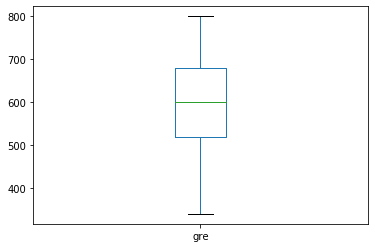

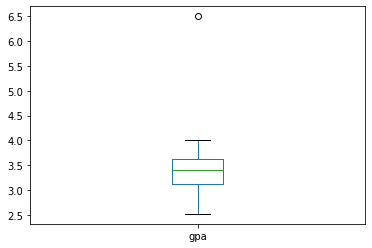

In [109]:
# Outlier Check
df = pd.DataFrame(admission, columns=['gre'])
df.plot.box()

df = pd.DataFrame(admission, columns=['gpa'])
df.plot.box()


In [110]:
# Outlier Treatment
admission.loc[admission['gpa']>4, 'gpa'] = 4 

admission.describe()

,gre,gpa,admit
count,150.000000,150.000000,150.000000
mean,605.066667,3.383800,0.420000
std,110.743350,0.363744,0.495212
min,340.000000,2.520000,0.000000
25%,520.000000,3.122500,0.000000
50%,600.000000,3.395000,0.000000
75%,680.000000,3.630000,1.000000
max,800.000000,4.000000,1.000000


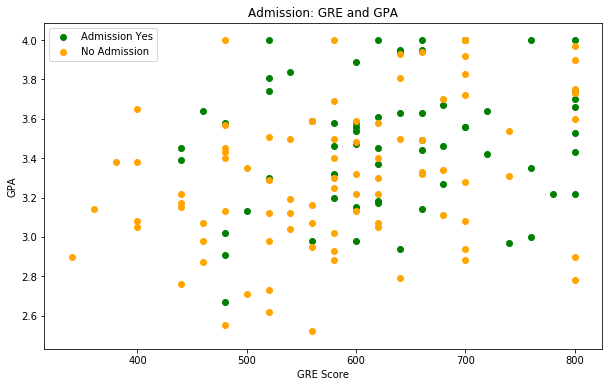

In [111]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# Scatter Plot
plt.figure(figsize=(10,6))
# Admission Yes
plt.scatter(admission.gre[admission.admit==1], 
            admission.gpa[admission.admit==1], 
            c="green") 

# Admission No
plt.scatter(admission.gre[admission.admit==0], 
            admission.gpa[admission.admit==0], 
            c="orange") 

# Add  labels and title
plt.title("Admission: GRE and GPA")
plt.xlabel("GRE Score")
plt.legend(["Admission Yes", "No Admission"])
plt.ylabel("GPA");

## Percentron Model From Scratch

Considering the scatter plot, we have to be realistic that the model accuracy may not be great. It suggests that there may be more features or student information that governs admission to graduation schools not just these two scores.

We consider first 10 observations and see the steps manually. 


In [60]:
admit = admission
len(admit)

150

In [61]:
admit.admit.value_counts()

0    87
1    63
Name: admit, dtype: int64

In [113]:
# scale GRE and GPA
admitX = admit[['gre','gpa']]
admitX=(admitX-admitX.mean())/admitX.std()
admitY = admit['admit']
# combine feature and target
admitDF = admitX.merge(admitY,left_index=True,right_index=True)

In [114]:
# Convert to a list
dataset =admitDF.values.tolist()

In [115]:
# bias, w1 and w2
weights = [-0.1, 0.1, 0.1]

In [116]:
# Predict for each X vector and Weight Vector
def predict(row, weights):
    activation = weights[0]
    for i in range(len(row)-1):
        activation += weights[i + 1] * row[i]
    return 1.0 if activation >= 0.0 else 0.0

# Estimate Perceptron weights using stochastic gradient descent
def train_weights(train, l_rate, n_epoch):    
    # Initialize weights for each columns
    weights = [0.0 for i in range(len(train[0]))]
    for epoch in range(n_epoch):
        sum_error = 0.0
        for row in train:
            prediction = predict(row, weights)
            # assumed the last column is label
            error = row[-1] - prediction
            sum_error += error**2
            # Update bias - first element of weight vector
            weights[0] = weights[0] + l_rate * error      
            for i in range(len(row)-1):                
                # Update weights of X
                weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
        print('Epoch=%d, Learning Rate=%.3f, Error=%.3f' % (epoch, l_rate, sum_error/len(train)))
    return weights

# Source: https://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python/

In [117]:
# Define Parameters
l_rate = 0.1
n_epoch = 10

# Train the model
weights = train_weights(dataset, l_rate, n_epoch)

Epoch=0, Learning Rate=0.100, Error=0.500
Epoch=1, Learning Rate=0.100, Error=0.493
Epoch=2, Learning Rate=0.100, Error=0.487
Epoch=3, Learning Rate=0.100, Error=0.507
Epoch=4, Learning Rate=0.100, Error=0.467
Epoch=5, Learning Rate=0.100, Error=0.467
Epoch=6, Learning Rate=0.100, Error=0.420
Epoch=7, Learning Rate=0.100, Error=0.507
Epoch=8, Learning Rate=0.100, Error=0.487
Epoch=9, Learning Rate=0.100, Error=0.467


In [118]:
# updated weights: # bias, w1 and w2
weights

[-0.20000000000000004, -0.08114858993660753, 0.20552922035777724]

In [119]:
# Predicted Class
pred_class =[]
for row in dataset:
    prediction = predict(row, weights)
    pred_class.append(prediction)
    

In [120]:
# Compare Predicted and Actual Class
from sklearn.metrics import confusion_matrix
confusion_matrix(admitY, pred_class,normalize='true')

array([[0.89655172, 0.10344828],
       [0.74603175, 0.25396825]])

## Percentron Model - Tensorflow

We will convert data to Tensorflow dataset.

In [122]:
# Data for Tensorflow
dataset = tf.data.Dataset.from_tensor_slices((admitX.values, admitY.values))

In [123]:
# Review data
for feat, targ in dataset.take(5):
    print ('Features: {}, Target: {}'.format(feat, targ))

Features: [1.76022609 1.69404903], Target: 1
Features: [ 1.39903059 -1.05513797], Target: 1
Features: [-0.40694693 -1.11012171], Target: 1
Features: [-1.85172895 -0.83520301], Target: 0
Features: [0.85723733 1.47411407], Target: 0


### Shuffle and batch the dataset

Shuffling the input data and define the batch size.

Batch Size is number of training examples used in one iteration. In each iteration algorithm's parameters are updated.

In [137]:
train_dataset = dataset.shuffle(len(admitY)).batch(2)

### Define Network Structure

This is a very simple network with only singal input layer and with one aggregation input. We have also not used any activation function, it will apply a default activation.

For calculating loss, we have used BinaryCrossentropy as this typically used for binary classification problem.

In [133]:
import tensorflow as tf
from tensorflow.keras import layers as layers
def get_compiled_model():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, activation=None, use_bias=True)
  ])
    model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])
    return model

### Fitting the Model to Data

The model structure defined above is trained on the training sample. Number of epoch used are 15.

In [146]:
model = get_compiled_model()
model.fit(train_dataset, epochs=5)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 1/5
75/75 [==============================] - 1s 13ms/step - loss: 0.6498 - accuracy: 0.5867
Epoch 2/5
75/75 [==============================] - 0s 3ms/step - loss: 0.6499 - accuracy: 0.5800
Epoch 3/5
75/75 [==============================] - 0s 3ms/step - loss: 0.6450 - accuracy: 0.5800
Epoch 4/5
75/75 [==============================] - 0s 4ms/step - loss: 0.6456 - accuracy: 0.5867
Epoch 5/5
75/75 [==============================] - 0s 4ms/step - loss: 0.6429 - accuracy: 0.5933


In [139]:
first_layer_weights = model.layers[0].get_weights()[0]
first_layer_biases  = model.layers[0].get_weights()[1]
print(first_layer_biases)

[-0.17877403]


In [140]:
first_layer_weights

array([[ 0.56233454],
       [-0.02756108]], dtype=float32)

In [141]:
## Predict using Network
predictions = model.predict(train_dataset)
pred_class_tf=[]
for r in predictions:
    if r>0:
        pred_class_tf.append(1)
    else:
        pred_class_tf.append(0)

In [147]:
# Compare Predicted and Actual Class
from sklearn.metrics import confusion_matrix
confusion_matrix(admitY, pred_class_tf,normalize='true')

array([[0.64367816, 0.35632184],
       [0.63492063, 0.36507937]])